# Classification with K-nn and Decision Trees

## Exploring E.coli Dataset


The dataset describes the problem of classifying [E.coli proteins](https://en.wikipedia.org/wiki/Escherichia_coli) using their amino acid sequences in their cell localization sites. That is, predicting how a protein will bind to a cell based on the chemical composition of the protein before it is folded.

The dataset is credited to Kenta Nakai and was developed into its current form by **Paul Horton** and **Kenta Nakai** in their 1996 paper titled ["*A Probabilistic Classification System For Predicting The Cellular Localization Sites Of Proteins.*"](https://pubmed.ncbi.nlm.nih.gov/8877510/) In it, they achieved a classification accuracy of 81 percent.

The dataset is comprised of 336 examples of E.coli proteins and each example is described using seven input variables calculated from the proteins amino acid sequence.

<p>
    <img src="https://i.la-croix.com/1400x933/smart/2022/03/31/1201207976/bacterie-Escherichia-reside-digestif-lhomme-animaux-chaud_0.jpg" width=500>
</p>


### Attribute Information

1. *mcg*: McGeoch's method for signal sequence recognition.
2. *gvh*: von Heijne's method for signal sequence recognition.
3. *lip*: von Heijne's Signal Peptidase II consensus sequence score.
4. *chg*: Presence of charge on N-terminus of predicted lipoproteins.
5. *aac*: score of discriminant analysis of the amino acid content of outer membrane and periplasmic proteins.
6. *alm1*: score of the ALOM membrane spanning region prediction program.
7. *alm2*: score of ALOM program after excluding putative cleavable signal regions from the sequence.

### Class Distribution.

There are eight classes described as follows:

- **cp**  (cytoplasm)                                  
- **im**  (inner membrane without signal sequence)                  
- **pp**  (perisplasm)                                  
- **imU** (inner membrane, uncleavable signal sequence) 
- **om**  (outer membrane)                               
- **omL** (outer membrane lipoprotein)                   
- **imL** (inner membrane lipoprotein)                   
- **imS** (inner membrane, cleavable signal sequence)    



## TODO : 

- Data preprocessing
    - [x] Balancing
    - [ ] PCA
- Analysis
    - [x] Describe dataset
    - [x] histograms
    - [x] boxplot
    - [x] correlation matrix
    - [ ] Comment results
- Classification
    - [ ] KNN
    - [ ] Decision Tree

In [55]:
# Loading the dataset
import pandas as pd

names = ["Sequence Name", "mcg", "gvh", "lip", "chg", "aac", "alm1", "alm2", "location"]
ecoli = pd.read_csv("data/ecoli.data",names=names)
ecoli.drop(["Sequence Name"], axis=1, inplace = True) # drop sequence name as it does not contain generalizable information for modeling
# drop ...
ecoli.drop(ecoli[(ecoli["location"]=="om") | (ecoli["location"]=="omL") | (ecoli["location"]=="imL") | (ecoli["location"]=="imS") ].index, axis=0, inplace= True)
ecoli.head()

,mcg,gvh,lip,chg,aac,alm1,alm2,location
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


In [54]:
# Description of the dataset
ecoli.describe()

,mcg,gvh,lip,chg,aac,alm1,alm2,location
count,307.000000,307.000000,307.000000,307.0,307.000000,307.000000,307.000000,307.000000
mean,0.482573,0.486254,0.483388,0.5,0.483844,0.499739,0.515993,0.931596
std,0.193564,0.141366,0.041902,0.0,0.107789,0.223112,0.206084,1.044067
min,0.000000,0.160000,0.480000,0.5,0.000000,0.030000,0.000000,0.000000
25%,0.335000,0.390000,0.480000,0.5,0.420000,0.320000,0.360000,0.000000
50%,0.470000,0.460000,0.480000,0.5,0.480000,0.450000,0.440000,1.000000
75%,0.640000,0.550000,0.480000,0.5,0.560000,0.715000,0.730000,2.000000
max,0.890000,1.000000,1.000000,0.5,0.750000,1.000000,0.990000,3.000000


In [53]:
# Infos
ecoli.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307 entries, 0 to 335
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mcg       307 non-null    float64
 1   gvh       307 non-null    float64
 2   lip       307 non-null    float64
 3   chg       307 non-null    float64
 4   aac       307 non-null    float64
 5   alm1      307 non-null    float64
 6   alm2      307 non-null    float64
 7   location  307 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 21.6 KB


In [56]:
ecoli.loc[ecoli["location"] == "pp"]

,mcg,gvh,lip,chg,aac,alm1,alm2,location
284,0.74,0.49,0.48,0.5,0.42,0.54,0.36,pp
285,0.70,0.61,0.48,0.5,0.56,0.52,0.43,pp
286,0.66,0.86,0.48,0.5,0.34,0.41,0.36,pp
287,0.73,0.78,0.48,0.5,0.58,0.51,0.31,pp
288,0.65,0.57,0.48,0.5,0.47,0.47,0.51,pp
289,0.72,0.86,0.48,0.5,0.17,0.55,0.21,pp
290,0.67,0.70,0.48,0.5,0.46,0.45,0.33,pp
291,0.67,0.81,0.48,0.5,0.54,0.49,0.23,pp
292,0.67,0.61,0.48,0.5,0.51,0.37,0.38,pp
293,0.63,1.00,0.48,0.5,0.35,0.51,0.49,pp


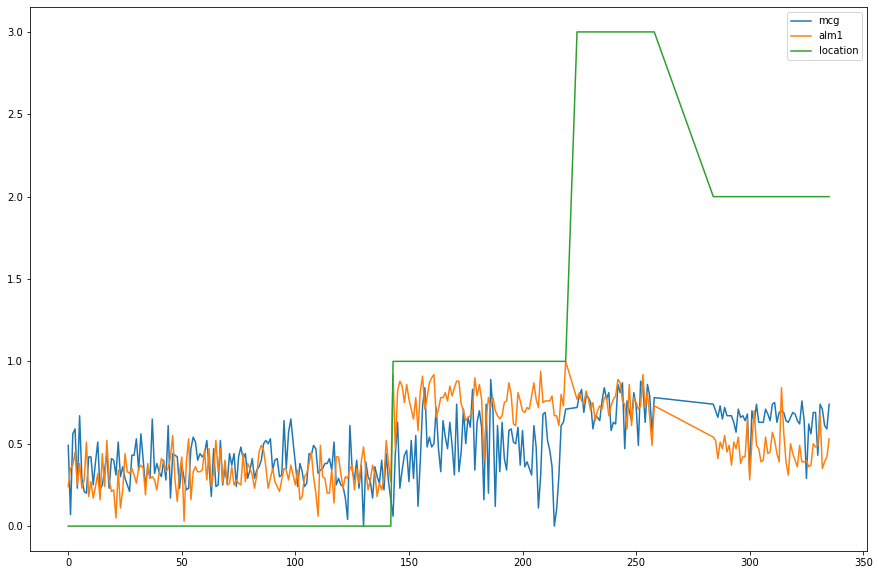

In [51]:
import matplotlib.pyplot as plt

# replace categorical data into quantitative
cleanup_nums = {"location": {"cp": 0, "im": 1,  "pp": 2 , "imU": 3}}
ecoli = ecoli.replace(cleanup_nums)
ecoli["mcg"].plot(figsize=(15,10))
ecoli["alm1"].plot()
ecoli["location"].plot()
plt.legend() 
plt.show()

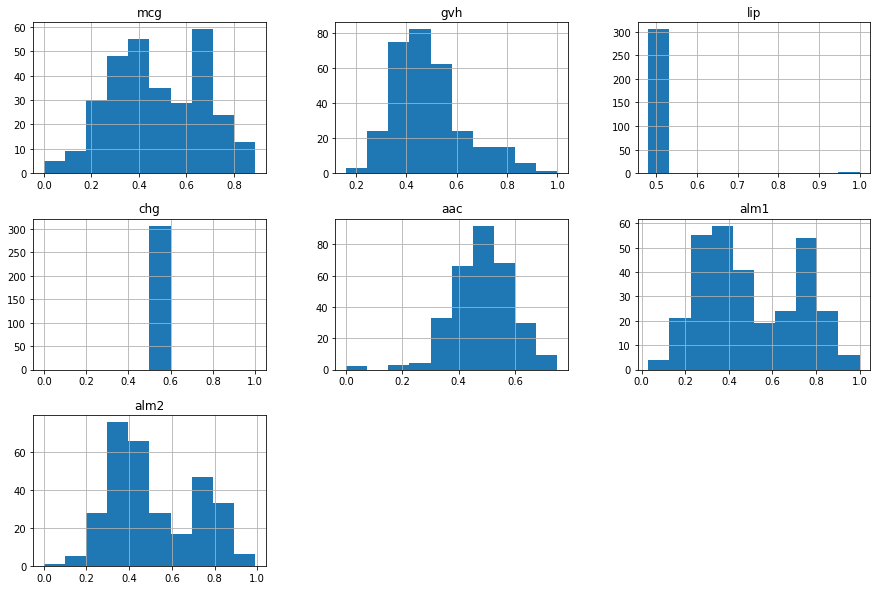

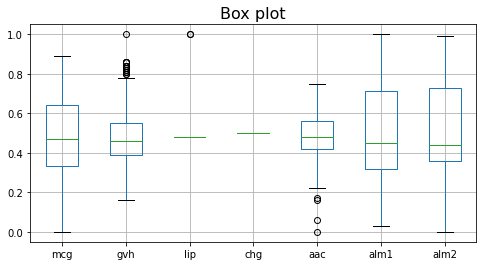

In [61]:
#histograms
ecoli.hist(figsize=(15,10))
plt.show()

#boxplot
ecoli.boxplot(figsize=(8,4))
plt.title("Box plot", fontsize=16) # show the distribution of the data through displaying the data quartiles and median.
plt.show()

           mcg       gvh       lip  chg       aac      alm1      alm2
mcg   1.000000  0.426357  0.026159  NaN  0.123890  0.416450  0.278154
gvh   0.426357  1.000000  0.039444  NaN -0.130241  0.205898 -0.033765
lip   0.026159  0.039444  1.000000  NaN  0.049782  0.087344  0.099971
chg        NaN       NaN       NaN  NaN       NaN       NaN       NaN
aac   0.123890 -0.130241  0.049782  NaN  1.000000  0.348308  0.470245
alm1  0.416450  0.205898  0.087344  NaN  0.348308  1.000000  0.853031
alm2  0.278154 -0.033765  0.099971  NaN  0.470245  0.853031  1.000000


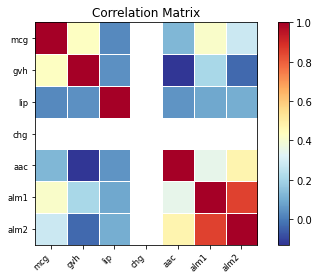

In [60]:
#correlation matirx
corr = ecoli.corr()
print(corr)
import statsmodels.api as sm
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

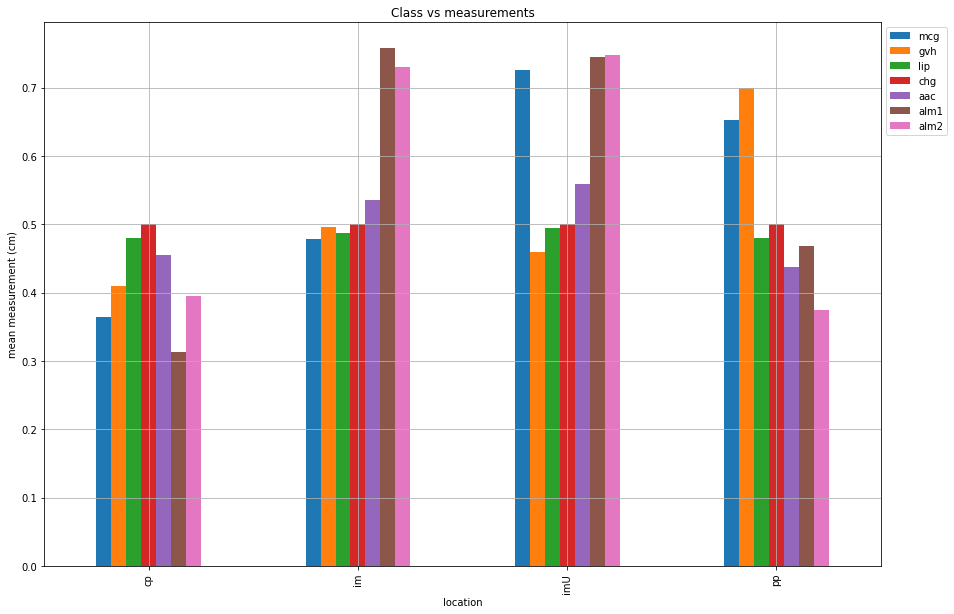

In [63]:
ecoli.groupby(by = "location").mean()
ecoli.groupby(by="location").mean().plot(kind="bar", figsize=(15,10))
plt.title('Class vs measurements')
plt.ylabel('mean measurement (cm)')
plt.grid(True)
plt.legend(loc="upper left", bbox_to_anchor=(1,1)) 
plt.show()